<a href="https://colab.research.google.com/github/MARIBELCT2015/Data_Movies_TVShows/blob/main/Datathon_Uniandes_Maribel_Cifuentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datathon - Uniandes

In [ ]:
#importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import missingno as msno
pd.set_option("display.max_columns", None)

##Diccionario de datos
●show_id: A unique integer identifier for the show

● type: The type of content, Movie or TV Show

● title: The title of the content

● director: The director (or directors)

● cast: The cast

● country: Country (or countries) where the content is available

● date_added: Date added to Netflix

● release_year: Year of content release

● rating: Content rating

● duration: The duration

● listed_in: The genres the content is listed in

● description: A description of the content

#Cargue de datos

In [ ]:
df1 = pd.read_csv('netflix_titles_dirty_01.csv.gz', compression='gzip', sep = "\t", on_bad_lines='skip')
df2 = pd.read_csv('netflix_titles_dirty_02.csv.gz', compression='gzip', sep = "\t", on_bad_lines='skip')
df3 = pd.read_csv('netflix_titles_dirty_03.csv.gz', compression='gzip', sep = "\t", on_bad_lines='skip')

In [ ]:
# Dimensión de las bases de datos
df1.shape, df2.shape, df3.shape

((993, 12), (992, 12), (993, 12))

In [ ]:
#Agregar  la cabecera a los datos según el diccionario de datos

nombres_columnas=['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description']

df1.columns=nombres_columnas
df2.columns=nombres_columnas
df3.columns=nombres_columnas

In [ ]:
df1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df1.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81029831,Movie,"All's Well, End's Well (2009)",Vincent Kok,"Louis Koo, Sandra Ng Kwan Yue, Raymond Wong, R...",Hong Kong,"November 9, 2018",2009,TV-14,99 min,"Comedies, International Movies, Romantic Movies",Bound by a family rule that forbids him from m...
1,80194289,Movie,Gabriel and the Mountain,Fellipe Barbosa,"João Pedro Zappa, Caroline Abras, Alex Alembe,...","Brazil, France","November 9, 2018",2017,TV-MA,132 min,"Dramas, Independent Movies, International Movies","In a drama based on a true story, Brazilian ba..."
2,80191219,Movie,Lommbock,Christian Zübert,"Lucas Gregorowicz, Moritz Bleibtreu, Louis Hof...",Germany,"November 9, 2018",2017,TV-MA,106 min,"Comedies, International Movies","After finding love in drug-free Dubai, Stefan ..."
3,81005091,TV Show,Love O2O,NaN,"Shuang Zheng, Yang Yang, Rachel Momo, Bai Yu, ...",China,"November 9, 2018",2016,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",When a computer-science major gets dumped by h...
4,80169786,TV Show,Medal of Honor,NaN,"Oliver Hudson, Ben Schwartz, Paul Wesley, Aldi...",United States,"November 9, 2018",2018,TV-MA,1 Season,"Docuseries, TV Dramas",Honoring service members whose courage merited...


In [ ]:
df2.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016.0,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
1,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013.0,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
2,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016.0,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
3,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017.0,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
4,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...


In [ ]:
df3.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,80179907,Movie,Bridget Christie: Stand Up for Her,NaN,Bridget Christie,United Kingdom,"March 31, 2017",2016,TV-MA,51 min,Stand-Up Comedy,Performing stand-up for a packed house in Lond...
1,80152842,Movie,FirstBorn,Nirpal Bhogal,"Antonia Thomas, Luke Norris, Thea Petrie, Eile...",United Kingdom,"March 31, 2017",2016,TV-MA,90 min,"Horror Movies, International Movies",A young couple fights supernatural foes in an ...
2,80049928,TV Show,Five Came Back,Laurent Bouzereau,"Steven Spielberg, Guillermo del Toro, Lawrence...",United States,"March 31, 2017",2017,TV-MA,1 Season,Docuseries,Five acclaimed contemporary directors tell the...
3,70296765,Movie,GLOW: The Story of the Gorgeous Ladies of Wres...,Brett Whitcomb,NaN,United States,"March 31, 2017",2012,NR,77 min,"Documentaries, Sports Movies",This engaging documentary chronicles the 1980s...
4,80131168,Movie,Hiroshima: The Real History,Lucy van Beek,John Sessions,United Kingdom,"March 31, 2017",2015,TV-PG,95 min,Documentaries,This detailed examination of the 1945 Hiroshim...


In [ ]:
# Combinación de los datasets
datos = pd.concat([df1,df2,df3])

In [ ]:
datos.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81029831,Movie,"All's Well, End's Well (2009)",Vincent Kok,"Louis Koo, Sandra Ng Kwan Yue, Raymond Wong, R...",Hong Kong,"November 9, 2018",2009,TV-14,99 min,"Comedies, International Movies, Romantic Movies",Bound by a family rule that forbids him from m...
1,80194289,Movie,Gabriel and the Mountain,Fellipe Barbosa,"João Pedro Zappa, Caroline Abras, Alex Alembe,...","Brazil, France","November 9, 2018",2017,TV-MA,132 min,"Dramas, Independent Movies, International Movies","In a drama based on a true story, Brazilian ba..."
2,80191219,Movie,Lommbock,Christian Zübert,"Lucas Gregorowicz, Moritz Bleibtreu, Louis Hof...",Germany,"November 9, 2018",2017,TV-MA,106 min,"Comedies, International Movies","After finding love in drug-free Dubai, Stefan ..."
3,81005091,TV Show,Love O2O,NaN,"Shuang Zheng, Yang Yang, Rachel Momo, Bai Yu, ...",China,"November 9, 2018",2016,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",When a computer-science major gets dumped by h...
4,80169786,TV Show,Medal of Honor,NaN,"Oliver Hudson, Ben Schwartz, Paul Wesley, Aldi...",United States,"November 9, 2018",2018,TV-MA,1 Season,"Docuseries, TV Dramas",Honoring service members whose courage merited...
5,80190859,Movie,Outlaw King,David Mackenzie,"Chris Pine, Aaron Taylor-Johnson, Florence Pug...","United Kingdom, United States","November 9, 2018",2018,R,122 min,"Action & Adventure, Dramas","In 14th-century Scotland, Robert the Bruce cla..."
6,80218634,TV Show,Super Drags,NaN,"Fernando Mendonça, Sérgio Cantú, Wagner Follar...",Brazil,"November 9, 2018",2018,TV-MA,1 Season,"International TV Shows, TV Comedies","In this adult animated series, three gay co-wo..."
7,81022683,TV Show,The Queen of Flow,NaN,"Carolina Ramírez, Carlos Torres, Andrés Sandov...",Colombia,"November 9, 2018",2018,TV-14,1 Season,"Crime TV Shows, International TV Shows, Spanis...",Seventeen years after being wrongly imprisoned...
8,80201862,TV Show,Westside,NaN,NaN,United States,"November 9, 2018",2018,TV-MA,1 Season,Reality TV,Nine struggling musicians share the spotlight ...
9,80114869,TV Show,Case,NaN,"Steinunn Ólína Þorsteinsdóttir, Magnús Jónsson...",Iceland,"November 9, 2016",2015,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A smart lawyer whose drinking and recklessness...


In [ ]:
datos.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
datos.shape

(2978, 12)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2978 entries, 0 to 992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2977 non-null   object
 1   type          2951 non-null   object
 2   title         2949 non-null   object
 3   director      2236 non-null   object
 4   cast          2674 non-null   object
 5   country       2698 non-null   object
 6   date_added    2946 non-null   object
 7   release_year  2942 non-null   object
 8   rating        2940 non-null   object
 9   duration      2945 non-null   object
 10  listed_in     2940 non-null   object
 11  description   2937 non-null   object
dtypes: object(12)
memory usage: 302.5+ KB


## Limpieza

In [ ]:
# Verificando la cantidad de valores faltantes para cada columna.
datos.isnull().sum()

show_id           1
type             27
title            29
director        742
cast            304
country         280
date_added       32
release_year     36
rating           38
duration         33
listed_in        38
description      41
dtype: int64

In [ ]:
# Columna que deseas convertir a numérica
column_to_convert = 'release_year'

# Utiliza pd.to_numeric para convertir la columna a numérica
datos[column_to_convert] = pd.to_numeric(datos[column_to_convert], errors='coerce')

# La opción 'coerce' convierte los valores no numéricos a NaN (valores faltantes)

# Verifica el resultado
print(datos.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2978 entries, 0 to 992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       2977 non-null   object 
 1   type          2951 non-null   object 
 2   title         2949 non-null   object 
 3   director      2236 non-null   object 
 4   cast          2674 non-null   object 
 5   country       2698 non-null   object 
 6   date_added    2946 non-null   object 
 7   release_year  2937 non-null   float64
 8   rating        2940 non-null   object 
 9   duration      2945 non-null   object 
 10  listed_in     2940 non-null   object 
 11  description   2937 non-null   object 
dtypes: float64(1), object(11)
memory usage: 302.5+ KB
None


In [ ]:
# Contiene los recuentos de los valores únicos en la columna 'released_year'
datos['listed_in'].value_counts()

Documentaries                                               155
Stand-Up Comedy                                             142
Dramas, International Movies                                137
Dramas, Independent Movies, International Movies             93
Comedies, Dramas, International Movies                       86
                                                           ... 
International TV Shows, TV Dramas, TV Thrillers               1
Cult Movies, Dramas, Independent Movies                       1
Action & Adventure, Classic Movies, International Movies      1
Classic Movies, Comedies, Sports Movies                       1
Children & Family Movies, Classic Movies, Comedies            1
Name: listed_in, Length: 334, dtype: int64

In [ ]:
## Medidas de tendencia central e identificación de datos atípicos
datos.describe()

,release_year
count,2937.000000
mean,2013.275792
std,9.356958
min,1942.000000
25%,2013.000000
50%,2016.000000
75%,2018.000000
max,2020.000000


In [ ]:
## Datos analíticos en variables categóricas
datos.describe(include= (["O"]))

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,2977,2951,2949,2236,2674,2698,2946,2940,2945,2940,2937
unique,2977,12,2934,1877,2616,336,632,18,164,334,2934
top,81029831,Movie,Tunnel,"Raúl Campos, Jan Suter",Jeff Dunham,United States,"November 1, 2019",TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,2244,3,10,6,925,92,966,698,155,3


In [ ]:
## No hay datos duplicados
datos.duplicated().sum()

0

In [ ]:
datos.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

¿Cual es la cantidad total de datos entre los tres archivos?

In [ ]:
993+993+992

2978

Text(0.5, 1.0, 'Missing de la base de datos')

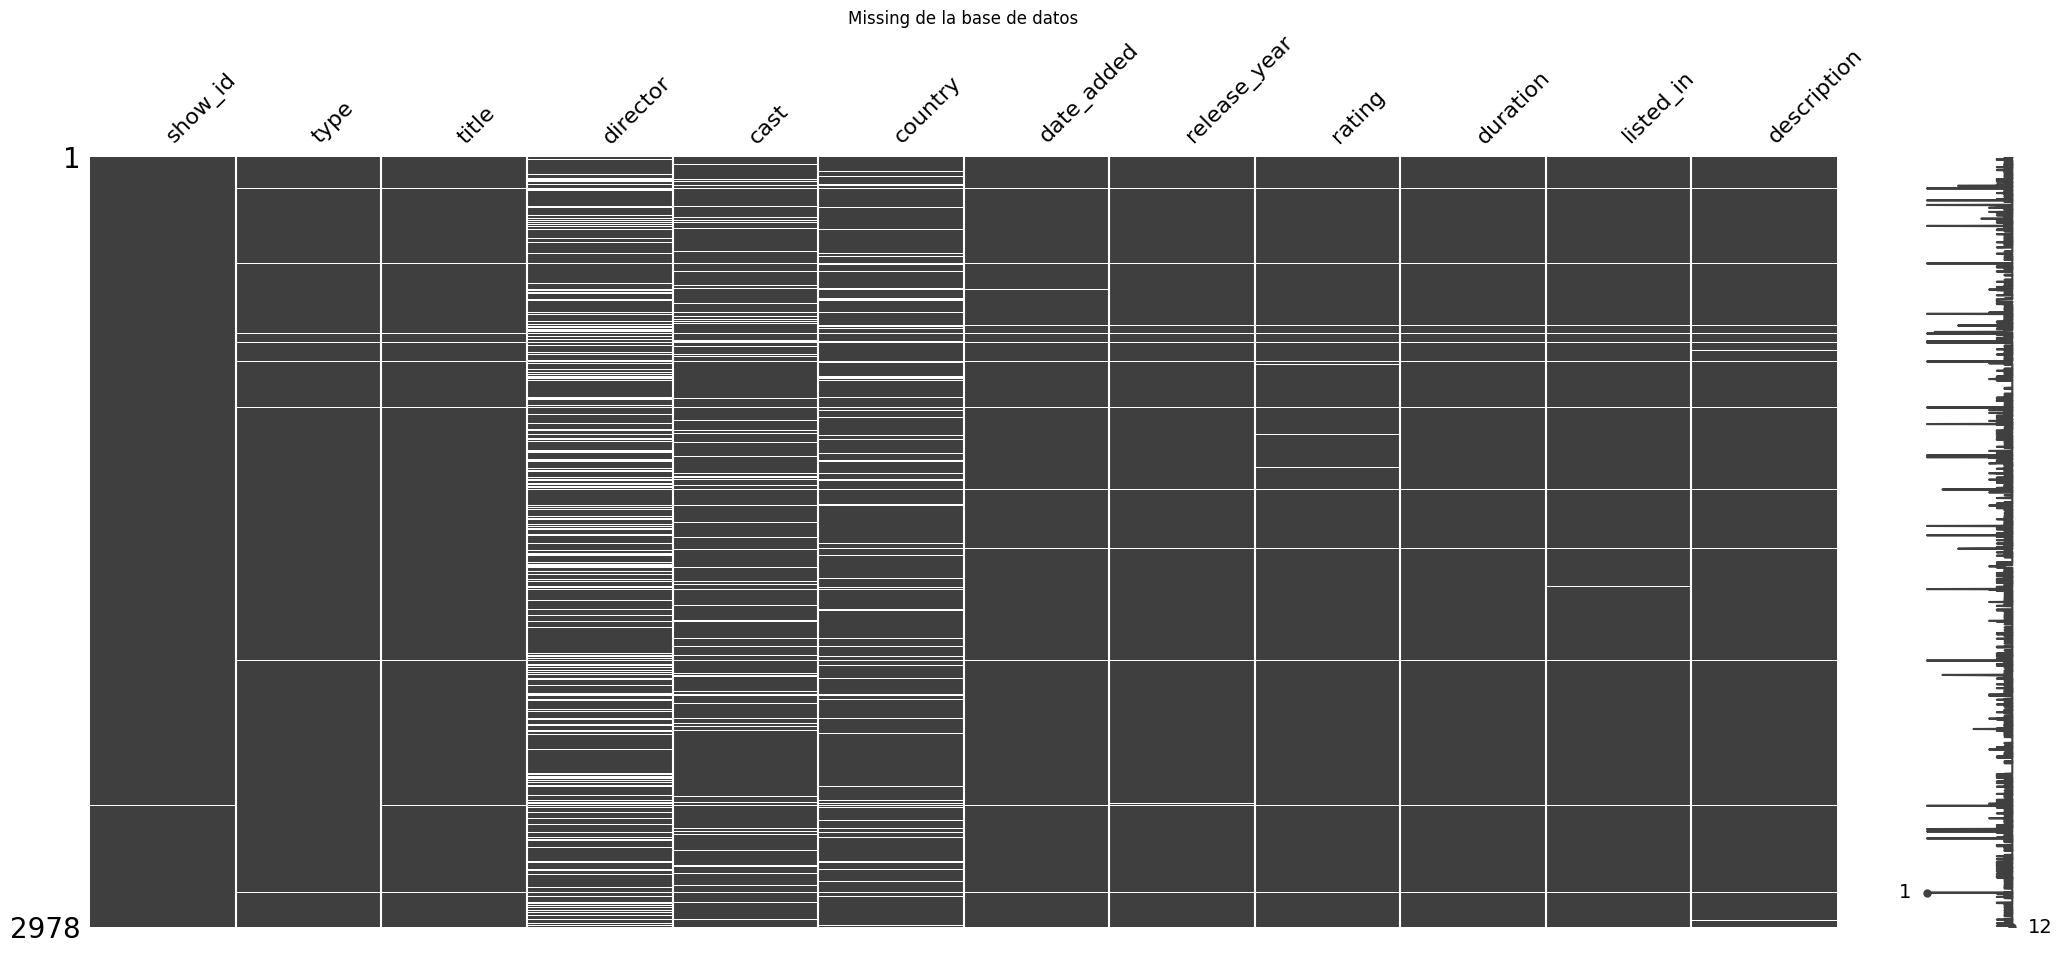

In [ ]:
import missingno as msno

msno.matrix(datos)
plt.title("Missing de la base de datos")

In [ ]:
datos['listed_in'].value_counts()

Documentaries                                               155
Stand-Up Comedy                                             142
Dramas, International Movies                                137
Dramas, Independent Movies, International Movies             93
Comedies, Dramas, International Movies                       86
                                                           ... 
International TV Shows, TV Dramas, TV Thrillers               1
Cult Movies, Dramas, Independent Movies                       1
Action & Adventure, Classic Movies, International Movies      1
Classic Movies, Comedies, Sports Movies                       1
Children & Family Movies, Classic Movies, Comedies            1
Name: listed_in, Length: 334, dtype: int64

¿Cual es la cantidad total de datos agrupados por género?

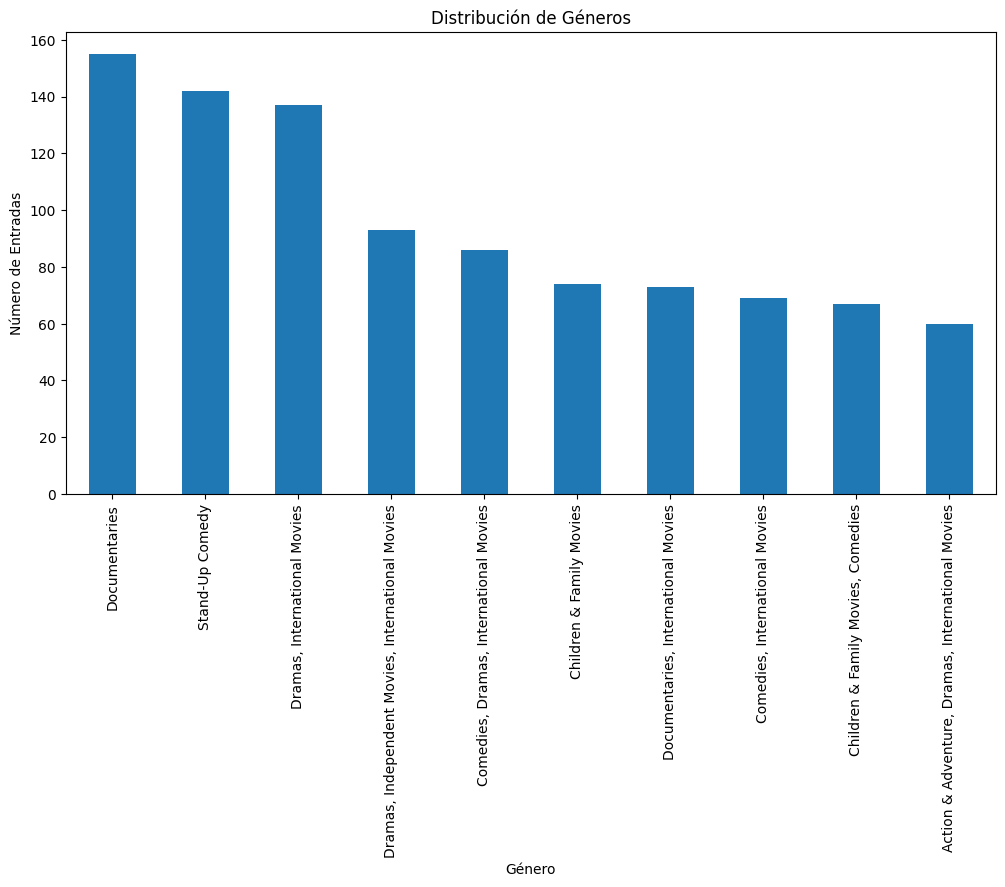

In [ ]:
# Contar los valores únicos en la columna "listed_in"
genre_counts = datos['listed_in'].value_counts()

# Limitar el número de géneros a mostrar en el gráfico (opcional)
top_genres = genre_counts.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Número de Entradas')
plt.show()


¿Cual es el contenido tipo “TV Show” con el nombre más largo contenido entre los tres archivos?

In [ ]:
#nombre mas largo de los TV show
datos_show = datos[datos['type'] == 'TV Show']

datos_show['longitud_nombre'] = datos_show['title'].apply(len)
longitud_valor_mas_largo = datos_show['longitud_nombre'].max()
print("Longitud del valor más largo:", longitud_valor_mas_largo)
datos_show[datos_show['longitud_nombre'] == 52]


Longitud del valor más largo: 52


<ipython-input-81-a18d7030ff49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_show['longitud_nombre'] = datos_show['title'].apply(len)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,longitud_nombre
989,80232149,TV Show,"Bure Kaam Bura Natija, Kyun Bhai Chacha Haan B...",NaN,NaN,NaN,"March 31, 2018",2017.0,TV-Y7,1 Season,Kids' TV,"A clever uncle-nephew duo solves mysteries, cr...",52
585,80997770,TV Show,The Vietnam War: A Film by Ken Burns and Lynn ...,"Ken Burns, Lynn Novick",NaN,United States,"June 20, 2018",2017.0,TV-MA,1 Season,Docuseries,"Ken Burns presents an epic 10-part, 18-hour ch...",52
616,80195801,TV Show,Club de Cuervos Presents: The Ballad of Hugo S...,NaN,"Jesús Zavala, Ianis Guerrero, Mauro Mauad, Ren...",United States,"June 18, 2018",2018.0,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",Chava Iglesias's doting personal assistant Hug...,52


¿Cual es el top 5 de paises con mas contenido de tipo “Movie”?

In [ ]:
datos_movie = datos[datos['type'] == 'Movie']
datos_movie['country'].value_counts()

United States                                                      770
India                                                              382
United Kingdom                                                      84
Canada                                                              55
Spain                                                               48
                                                                  ... 
France, Switzerland, Spain, United States, United Arab Emirates      1
Canada, United States, United Kingdom                                1
United States, United Kingdom, Canada, Japan                         1
Cambodia, United States                                              1
Germany, France, Luxembourg, United Kingdom, United States           1
Name: country, Length: 306, dtype: int64

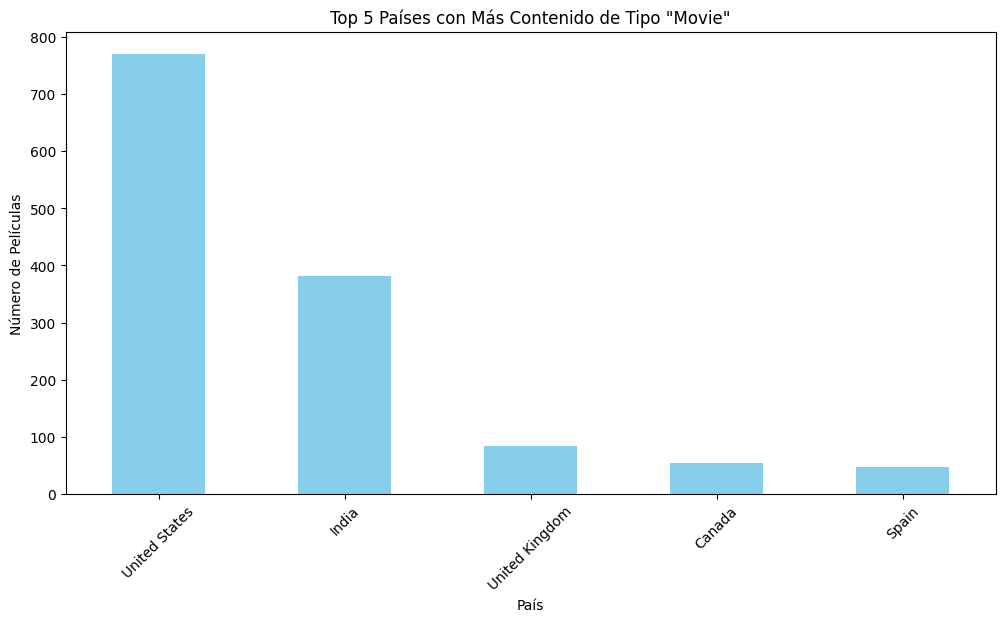

In [ ]:
# Filtrar el conjunto de datos para obtener solo películas
movies = datos[datos['type'] == 'Movie']

# Contar el número de películas por país
top_countries = movies['country'].value_counts().head(5)

# Crear un gráfico de barras para representar los países con más contenido "Movie"
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Países con Más Contenido de Tipo "Movie"')
plt.xlabel('País')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()


¿Cuales son las 3 series con más actores?

¿Cual es el director con más películas? Raúl Campos, Jan Suter es el director con más películas

In [ ]:
datos_movie['director'].value_counts()

Raúl Campos, Jan Suter         10
Hakan Algül                     7
Robert Vince                    6
Kunle Afolayan                  6
Jay Karas                       6
                               ..
Marc Forster                    1
Adam Shankman                   1
David Sampliner                 1
Aziz Ansari                     1
William Eubank, Will Eubank     1
Name: director, Length: 1827, dtype: int64

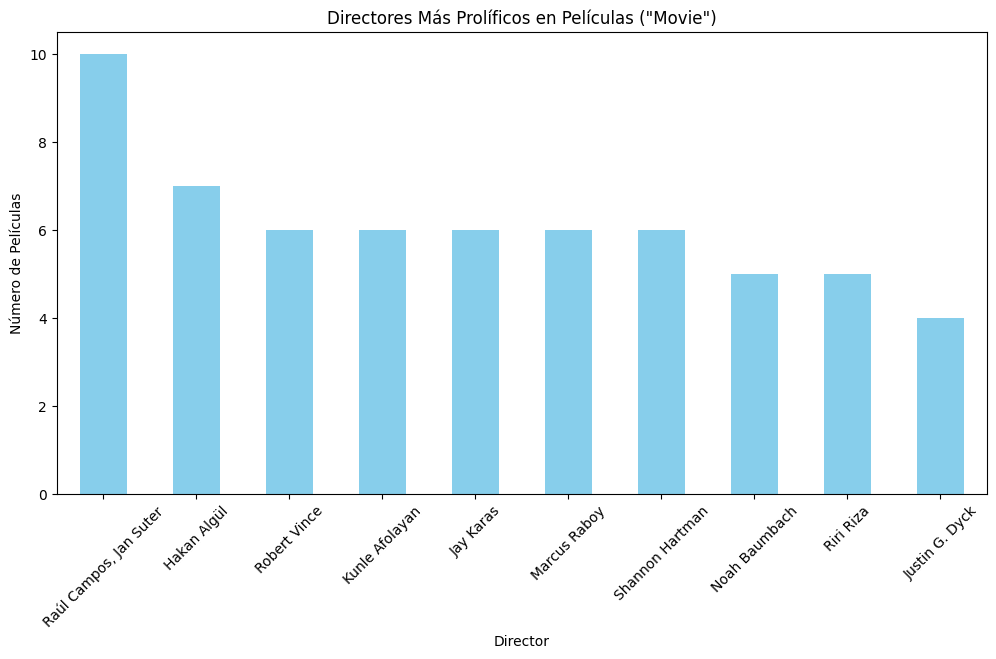

In [ ]:

# Filtrar el conjunto de datos para obtener solo películas
movies = datos[datos['type'] == 'Movie']

# Contar el número de películas dirigidas por cada director
director_counts = movies['director'].value_counts()

# Limitar el número de directores a mostrar en el gráfico (opcional)
top_directors = director_counts.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Directores Más Prolíficos en Películas ("Movie")')
plt.xlabel('Director')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()


● ¿Cuales son las 3 series con más actores?

In [ ]:
datos_filtrado['tamaño_cast'] = datos_filtrado['cast'].astype(str).apply(len)
datos_filtrado['tamaño_cast'].max()

NameError: ignored

In [ ]:
datos_series = datos[datos['type'] == 'cast']

datos_series['longitud_nombre'] = datos_show['title'].apply(len)
longitud_valor_mas_largo = datos_show['longitud_nombre'].max()
print("Longitud del valor más largo:", longitud_valor_mas_largo)
datos_show[datos_show['longitud_nombre'] == 52]

Longitud del valor más largo: 52


<ipython-input-83-a451dc1ea900>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_series['longitud_nombre'] = datos_show['title'].apply(len)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,longitud_nombre
989,80232149,TV Show,"Bure Kaam Bura Natija, Kyun Bhai Chacha Haan B...",NaN,NaN,NaN,"March 31, 2018",2017.0,TV-Y7,1 Season,Kids' TV,"A clever uncle-nephew duo solves mysteries, cr...",52
585,80997770,TV Show,The Vietnam War: A Film by Ken Burns and Lynn ...,"Ken Burns, Lynn Novick",NaN,United States,"June 20, 2018",2017.0,TV-MA,1 Season,Docuseries,"Ken Burns presents an epic 10-part, 18-hour ch...",52
616,80195801,TV Show,Club de Cuervos Presents: The Ballad of Hugo S...,NaN,"Jesús Zavala, Ianis Guerrero, Mauro Mauad, Ren...",United States,"June 18, 2018",2018.0,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",Chava Iglesias's doting personal assistant Hug...,52


Reto
Con base a los datos, conteste las siguientes preguntas usando Python y las librerías adicionales que considere necesarias.

Con una regresión lineal, estime cuantas peliculas del genero “drama” serán lanzadas en el 2020 de acuerdo a la información
disponible de años anteriores.
● Identifique cual es el director con más películas durante el 2018, luego con una regresión lineal estime en cuantas películas
participará en el 2019, compare su resultado con los datos reales encontrados en los datos.
Challenge: Use matplotlib para dibujar las regresiones lineales planteadas en las preguntas anteriores.